In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [88]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [89]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [90]:
test.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35452 entries, 0 to 35451
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         35452 non-null  int64  
 1   Q1            35333 non-null  float64
 2   Q2            35305 non-null  float64
 3   Q3            35322 non-null  float64
 4   Q4            35327 non-null  float64
 5   Q5            35362 non-null  float64
 6   Q6            35320 non-null  float64
 7   Q7            35310 non-null  float64
 8   Q8            35344 non-null  float64
 9   Q9            35348 non-null  float64
 10  Q10           35232 non-null  float64
 11  Q11           35333 non-null  float64
 12  Q12           35303 non-null  float64
 13  Q13           35356 non-null  float64
 14  Q14           35350 non-null  float64
 15  Q15           35345 non-null  float64
 16  Q16           35367 non-null  float64
 17  Q17           35373 non-null  float64
 18  Q18           35305 non-nu

In [93]:
eda_train = train.copy()

In [94]:
Answers = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
             'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
             'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
             'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
             'Q26']

<AxesSubplot:>

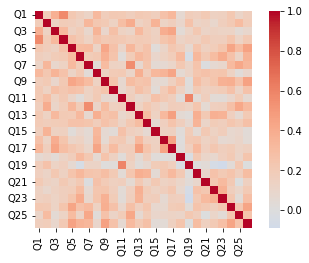

In [95]:
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [96]:
for col in train[Answers]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]
[1.0, 2.0, 3.0, 4.0, 5.0, nan]


In [97]:
train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Mach_score
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,3.653846
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,3.269231
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1,3.692308
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,3.500000
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0,3.461538


In [98]:
train[['Mach_score']].describe()

,Mach_score
count,14992.000000
mean,3.700245
std,0.584955
min,1.000000
25%,3.346154
50%,3.730769
75%,4.115385
max,5.000000


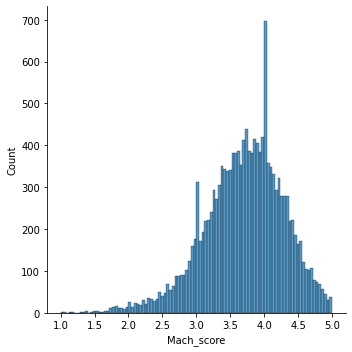

In [99]:
sns.displot(train, x="Mach_score", bins=100)